<a href="https://colab.research.google.com/github/rahul-createui/machine_learning/blob/main/svm_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df = pd.read_csv("Mental_Health_and_Social_Media_Balance_Dataset.csv")

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", acc)


SVM Accuracy: 0.49


In [6]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[ 0  0  0  1  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  7  3  0  0]
 [ 0  0  0  4 11  1  0]
 [ 0  0  0  2 11  1  2]
 [ 0  0  0  1  8  6  6]
 [ 0  0  0  1  3  1 28]]


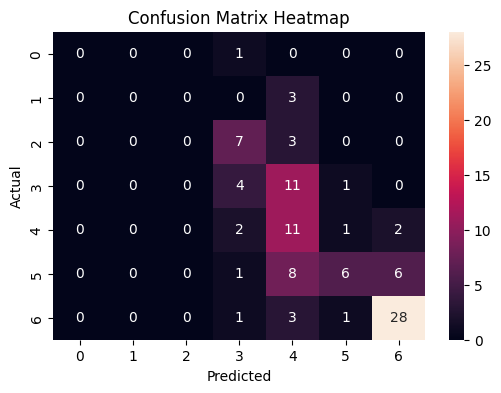

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

